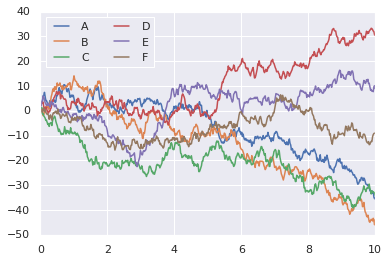

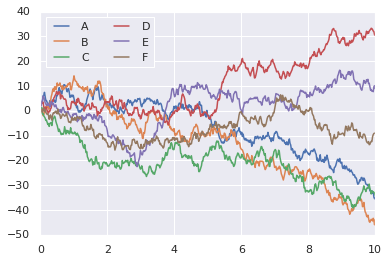

In [1]:
"""
    Matplotlib requiere de excesivo bajo nivel.
    Es antiguo y no actualiado, sobre todo con pandas
    que no se integra con dataframes directamente.
    
    Seaborn es un complemento de alto nivel de matplotlib
    una API de una API y resuelve estos problemas, un addon.
    
    Tiene buena documentación/tutorial
    https://seaborn.pydata.org/tutorial.html
"""

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

# Datos
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

# Matplotlib
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');
plt.show()

# Seaborn
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');
plt.show()

In [2]:
"""
    APUNTE NO IMPORTANTE
    Para matplotlib es necesario tratar previamente
    los datos; como agruparlos, ect. Por ejemplo:
"""

path = '/home/jtauste/PycharmProjects/Apuntes/time_series/data/raw/AirPassengers.csv'
df = pd.read_csv(path, 
                   na_values=".", 
                   parse_dates=True,
                   header=0,
                   index_col=0,
                   infer_datetime_format=True
                  ).dropna()

# Cuantos años hay?
df_agg = df.resample('y').mean()
df_agg.index = pd.to_datetime(df_agg.index).strftime('%Y')
print( list(df_agg.index) )
# O también:
print( list( df.index.strftime('%Y').unique()) ) # Mejor
# OJO: Si las fechas no hubieran estado en el índice, 
# no hubieran sido DatetimeIndex, y hubieran estado
# en una simple columna, se habría hecho con df.COLUMN_NAME.dt.year

# Total en cada mes independientemente del año
print( df.groupby(df.index.month).sum() )

['1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960']
['1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960']
       #Passengers
Month             
1             2901
2             2820
3             3242
4             3205
5             3262
6             3740
7             4216
8             4213
9             3629
10            3199
11            2794
12            3142


/home/jtauste/.local/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


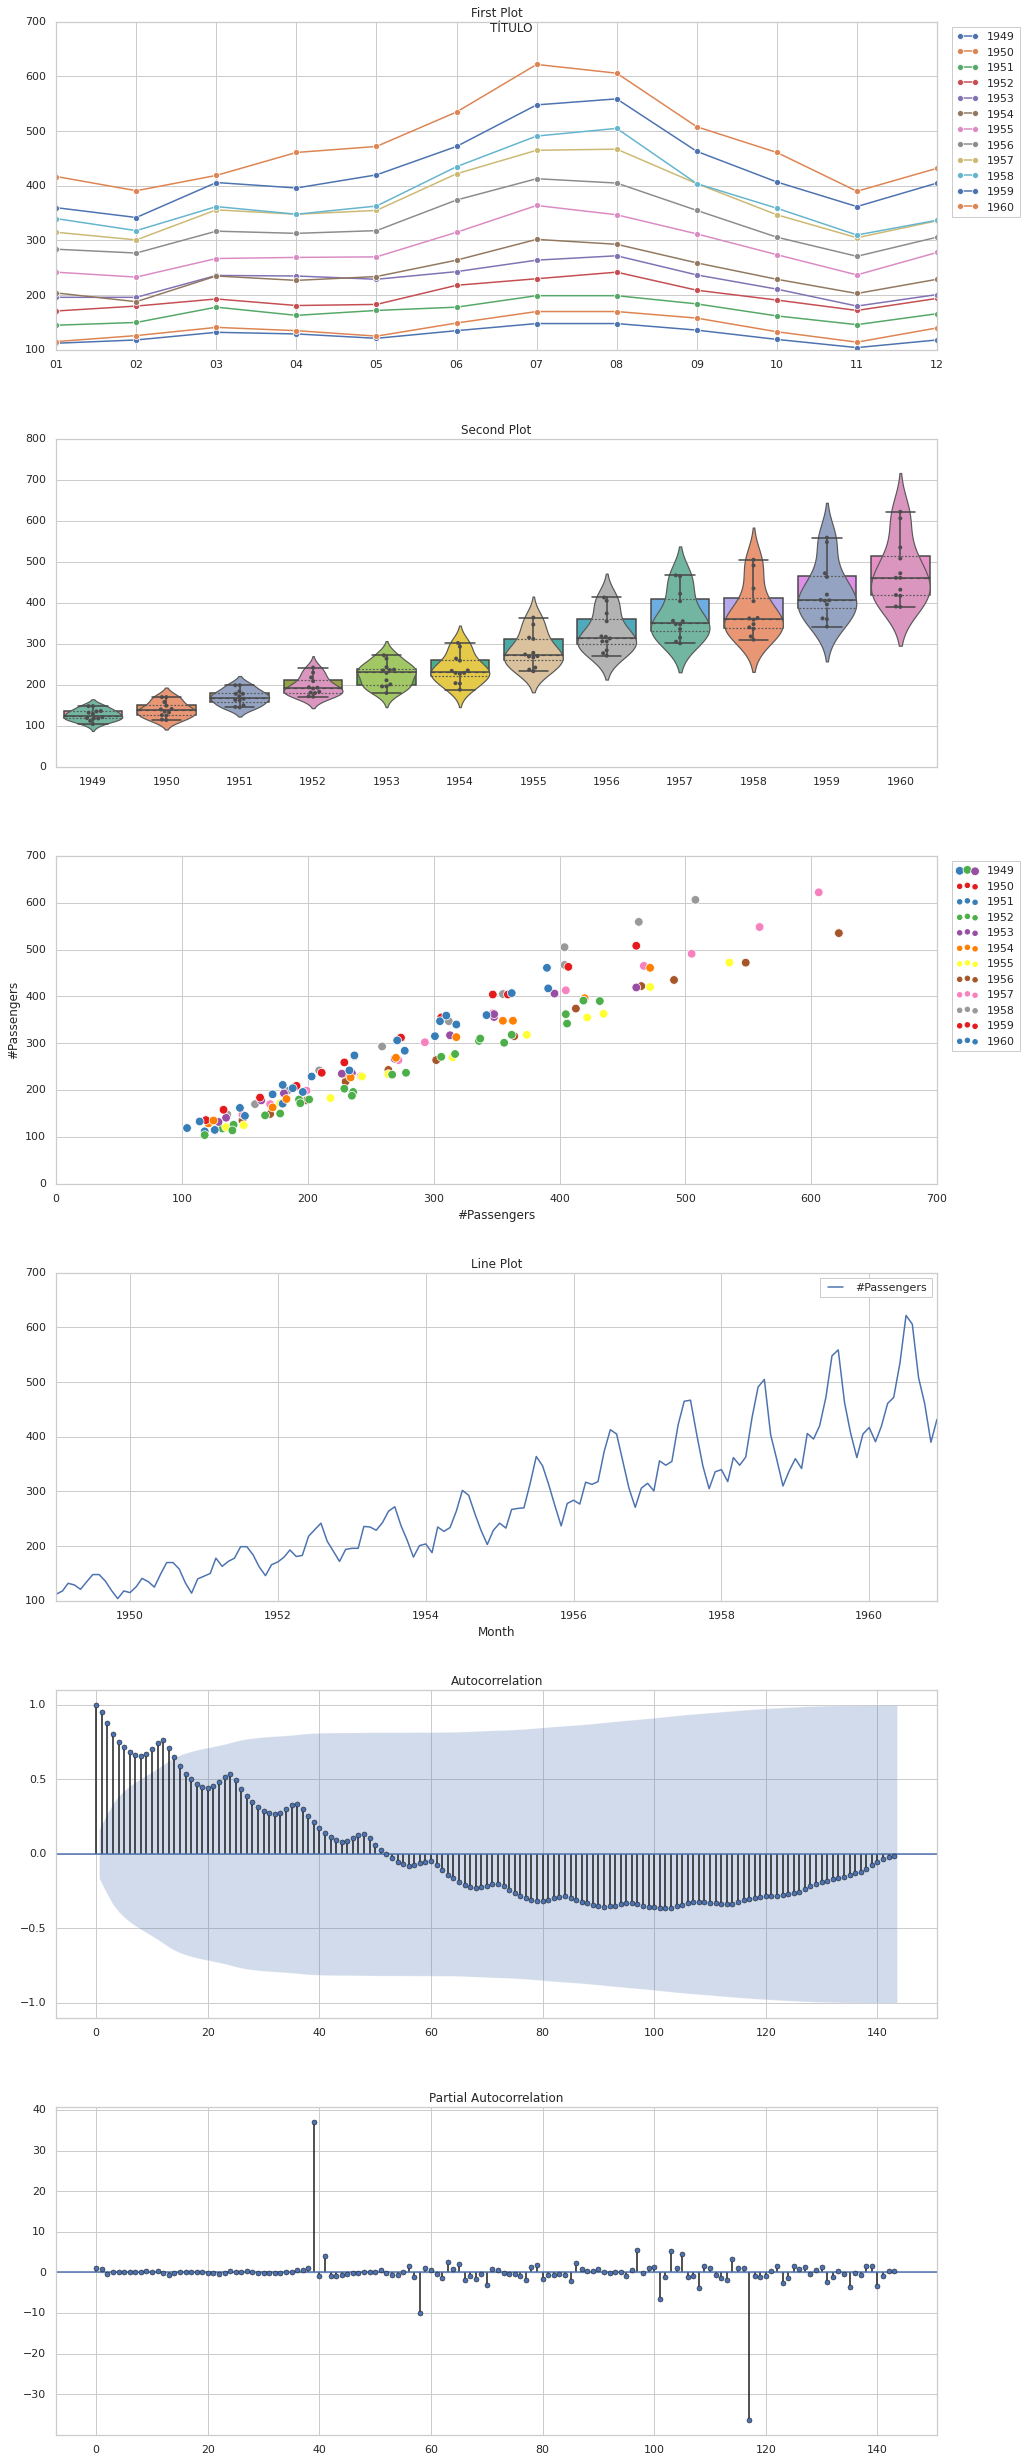

In [3]:
"""
    https://elitedatascience.com/python-seaborn-tutorial#step-2

    Seaborn es un "añadido" a matplotlib y por tanto
    se pueden usar al mismo tiempo para complementarse 
    mutuamente (hay cosas que seaborn no implementa, 
    set_xylim() por ejemplo). En el código, por lo 
    general, seaborn modifica el gráfico, sus parámetros
    modifican lo mismo que matplotlib puro.
    

    Seaborn trabaja de dos formas distintas, o pasando 
    el dataframe completo y señalando las columnas a tratar
    o pasando las series directamente:

    # Recommended way
    sns.lmplot(x='Attack', y='Defense', data=df)
    # Alternative way
    # sns.lmplot(x=df.Attack, y=df.Defense)
    
    O si es una serie temporal solo data=df
    
    
    Al igual que plt.style.use('seaborn-whitegrid') en seaborn
    sns.set_style('whitegrid') que suelen ser más bonitos.
    
    Aunque si se quiere más control sobre los colores se 
    puede crear una paleta concreta como una lista de '#112233'
    e introducirla como palette=LIST_COLORS 
    
    
    CUIDADO!:
    Existen 2 tipos de funciones en seaborn:
        "Axes-level", (regplot, boxplot, kdeplot, muchas más)
        "Figure-level", (lmplot, factorplot, jointplot pocas más) 
        no devuelve un objeto Axes y no se asigna al sub_plot.
    https://stackoverflow.com/questions/23969619/
"""
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

path = '/home/jtauste/PycharmProjects/Apuntes/time_series/data/raw/AirPassengers.csv'
df = pd.read_csv(path, 
                   na_values=".", 
                   parse_dates=True,
                   header=0,
                   index_col=0,
                   infer_datetime_format=True
                  ).dropna()

sns.set_style('whitegrid')
fig = plt.figure(figsize=(15, 35))

ax1 = fig.add_subplot(611)
ax2 = fig.add_subplot(612)
ax3 = fig.add_subplot(613)
ax4 = fig.add_subplot(614)
ax5 = fig.add_subplot(615)
ax6 = fig.add_subplot(616)
legend=[]

# SEASONAL LINE PLOT
for year in list( df.index.strftime('%Y').unique()):
    data_year = df[df.index.year == int(year)]
#     data_year = data_year.asfreq('D').interpolate(method='linear', order=2)
    legend.append(year)
    sns.lineplot(x=list( data_year.index.strftime('%m') ), 
                 y=list( data_year['#Passengers'].values ), 
                 ci=None,  # Confidence interval
                 # err_style='bars',
                 # estimator=None,
                 # lw=1,
                 marker='o',
                 ax=ax1)
    
ax1.legend(legend, bbox_to_anchor=(1.1, 1.0))
ax1.title.set_text('First Plot') 

# BOXPLOTS, VIOLINPLOTS, SWARMPLOTS
sns.boxplot(x=list(df.index.strftime('%Y')), y=list( df['#Passengers'].values ), ax=ax2, fliersize=0)
sns.swarmplot(x=list(df.index.strftime('%Y')), 
              y=list( df['#Passengers'].values ),
              color=".3", 
              size=4,
              ax=ax2)
sns.violinplot(x=list(df.index.strftime('%Y')), 
                     y=list( df['#Passengers'].values ),
                     palette="Set2", 
                     split=True,
                     dodge=False,
                     scale="count", 
                     inner="quartile",
                     linewidth=1.2,
                     ax=ax2)
ax2.title.set_text('Second Plot') 

# SERIAL CORRELATION o AUTOCORRELACIÓN N=1
legend = []
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
for year in list(df.index.strftime('%Y').unique()):
    data_year = df[df.index.year == int(year)]
    # Lag_plot, pandas lo ya implementa
    legend.append(year)
    sns.scatterplot(x=data_year['#Passengers'], 
                   y=data_year['#Passengers'].shift(1), 
#                  palette=sns.color_palette("husl", 12),
                   hue= list(data_year.index.strftime('%m')),
                   data= data_year,
                   s=75,
                   palette=sns.color_palette("Set1", len(list(df.index.strftime('%Y').unique()))),
                   ax=ax3)
    
ax3.legend(legend, bbox_to_anchor=(1.1, 1.0))


sns.lineplot(data=df, ax=ax4)
ax4.title.set_text('Line Plot')

# Dificil interpretarlas bien (y que las expliquen bien)
plot_acf(df, lags=df.shape[0]-1, ax=ax5)
plot_pacf(df, lags=df.shape[0]-1, ax=ax6)


# plt.title('HOLA')  # Este sustituiría al último .title.
fig.tight_layout(pad=3.0)  # Queremos espacio entre las gráficas
fig.suptitle("TÍTULO")  # Pero este sería el título global

plt.show()

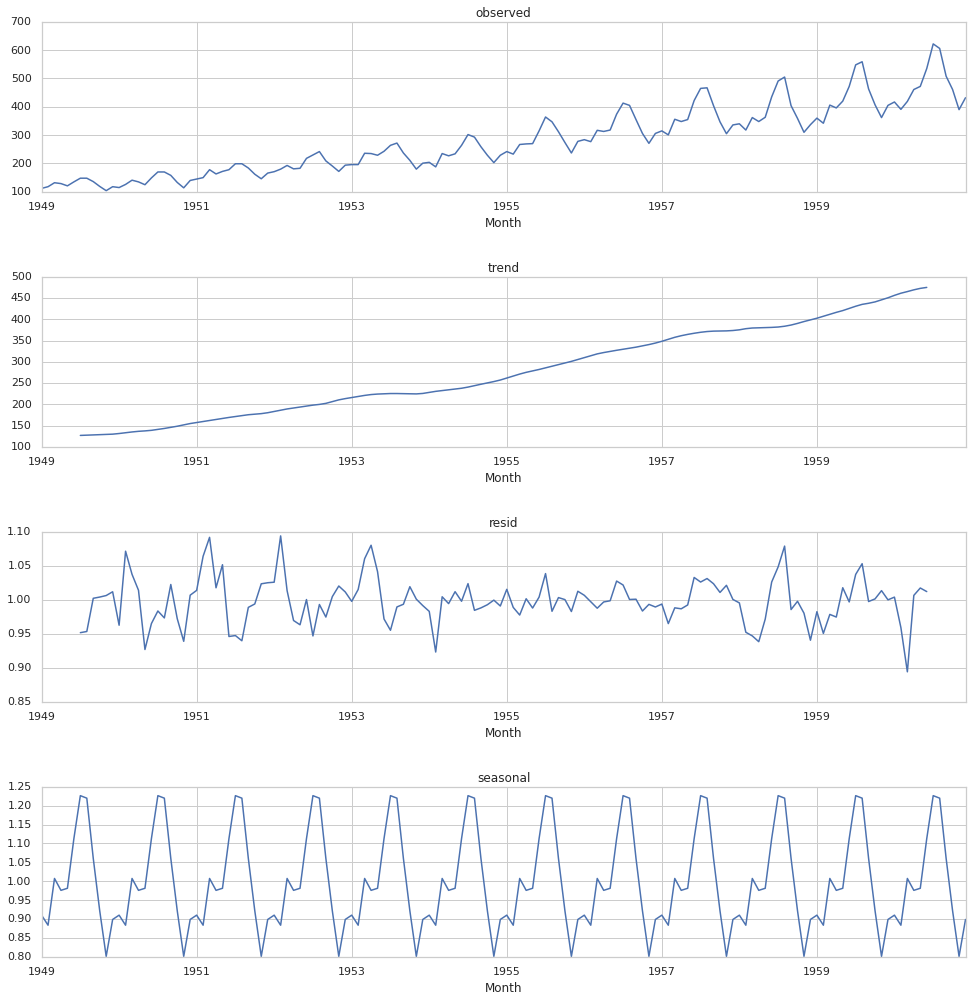

In [20]:
""" 
    DECOMPOSED PLOT:
    
    Las ST son tambien señales, ondas. Pueden estar compuestas por 
    otras señales como patrones distinguibles de distintas formas: 
    aditiva o multiplicativa, la última es para aquellas señales
    con temporalidades de varianza variable, creciente o decreciente.
"""

from statsmodels.tsa.seasonal import seasonal_decompose

sns.set_style('whitegrid')
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)
fig.tight_layout(pad=5.0) 

result = seasonal_decompose(df, model='multiplicative')  # model='multiplicative'/'additive', freq=1
result.observed.plot(ax=ax1)
ax1.title.set_text('observed')
result.trend.plot(ax=ax2)
ax2.title.set_text('trend')
result.resid.plot(ax=ax3)
ax3.title.set_text('resid')
result.seasonal.plot(ax=ax4)
ax4.title.set_text('seasonal')

# Experimental
Objetivo: 
* http://holoviews.org/gallery/demos/bokeh/nyc_radial_heatmap.html#demos-bokeh-gallery-nyc-radial-heatmap.
* https://github.com/holoviz/holoviews/issues/2139

10


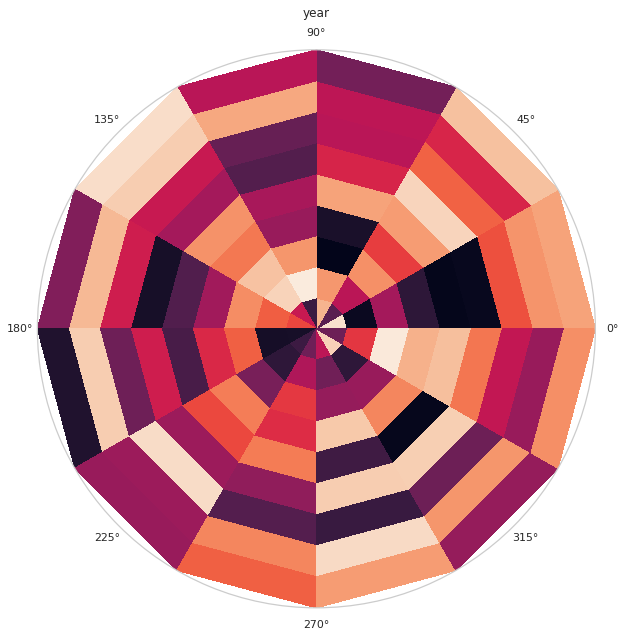

In [47]:
"""
    TODO: 
    seasonal subseries plot
    
    or radial
    polar seasonal line plot
    polar seasonal heatmap plot
    
    IMAGES!!
        
"""

import matplotlib.pyplot as plt
import numpy as np

# TODO
# mesh_data(dt='1949-12-29', how='day-hour')
# mesh_data(dt='1949', how='month-day')
# mesh_data(dt=['1949', '1950', '1951'], how='year-month')

theta, r = np.mgrid[0:2*np.pi:13j, 0:1:10j]
print(len(theta[0]))
z = np.random.random(theta.size).reshape(theta.shape)

fig, ax1 = plt.subplots(ncols=1, subplot_kw=dict(projection='polar'),  figsize=(10, 10))

ax1.pcolormesh(theta, r, z)
ax1.set_title('year')

ax1.set_ylim([0, 1])
ax1.set_yticklabels([])

plt.show()

In [16]:
# http://holoviews.org/gallery/demos/bokeh/nyc_radial_heatmap.html#demos-bokeh-gallery-nyc-radial-heatmap
import numpy as np
import pandas as pd
import holoviews as hv
from holoviews import opts
# hv.extension("bokeh")

# from bokeh.sampledata.unemployment1948 import data

# data = pd.melt(data.drop('Annual', 1), id_vars='Year', var_name='Month', value_name='Unemployment')
# heatmap = hv.HeatMap(data, label="US Unemployment (1948 - 2013)")

# colors = ["#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "#550b1d"]
# heatmap.opts(
#     opts.HeatMap(width=900, height=400, xrotation=45, xaxis='top', labelled=[],
#                  tools=['hover'], cmap=colors))




# load example data
# df_nyc = pd.read_csv("../../../assets/nyc_taxi.csv.gz", parse_dates=["Pickup_date"])

path = '/home/jtauste/PycharmProjects/Apuntes/time_series/data/raw/AirPassengers.csv'
df = pd.read_csv(path, 
                   na_values=".", 
                   parse_dates=True,
                   header=0,
                   index_col=0,
                   infer_datetime_format=True
                  ).dropna()


# create relevant time columns
df["Day & Hour"] = df.index.strftime("%A %H:00")
df["Week of Year"] = df.index.strftime("Week %W")
df["Date"] = df.index.strftime("%Y-%m-%d")

heatmap = hv.HeatMap(df, ["Day & Hour", "Week of Year"], ["#Passengers", "Date"])
xticks = ("Friday", "Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday")
heatmap.opts(
    radial=True, start_angle=np.pi*19/14, width=600, height=600,
    yticks=None, xticks=xticks, xmarks=7, ymarks=50)



# import matplotlib.pyplot as plt
# import numpy as np

# # TODO
# # mesh_data(dt='1949-12-29', how='day-hour')
# # mesh_data(dt='1949', how='month-day')
# # mesh_data(dt=['1949', '1950', '1951'], how='year-month')

# theta, r = np.mgrid[0:2*np.pi:13j, 0:1:10j]
# print(len(theta[0]))
# z = np.random.random(theta.size).reshape(theta.shape)

# fig, ax1 = plt.subplots(ncols=1, subplot_kw=dict(projection='polar'),  figsize=(10, 10))

# ax1.pcolormesh(theta, r, z)
# ax1.set_title('year')

# ax1.set_ylim([0, 1])
# ax1.set_yticklabels([])

# plt.show()

:HeatMap   [Day & Hour,Week of Year]   (#Passengers,Date)

In [11]:
df

#Passengers      Day & Hour Week of Year        Date
Month                                                           
1949-01-01          112  Saturday 00:00      Week 00  1949-01-01
1949-02-01          118   Tuesday 00:00      Week 05  1949-02-01
1949-03-01          132   Tuesday 00:00      Week 09  1949-03-01
1949-04-01          129    Friday 00:00      Week 13  1949-04-01
1949-05-01          121    Sunday 00:00      Week 17  1949-05-01
...                 ...             ...          ...         ...
1960-08-01          606    Monday 00:00      Week 31  1960-08-01
1960-09-01          508  Thursday 00:00      Week 35  1960-09-01
1960-10-01          461  Saturday 00:00      Week 39  1960-10-01
1960-11-01          390   Tuesday 00:00      Week 44  1960-11-01
1960-12-01          432  Thursday 00:00      Week 48  1960-12-01

[144 rows x 4 columns]